In [39]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Загружаем исходный датасет
df = pd.read_csv('water_potability.csv')

# Загружаем модель
model = keras.models.load_model('repo-keras/ml_baseline.keras')

# Получаем признаки без целевой переменной
X = df.drop('Potability', axis=1)

# Делаем предсказания
predictions = model.predict(X)

# Добавляем вероятности
df['pred_probability'] = predictions

# Добавляем предсказанные классы (0 или 1)
df['pred_class'] = (predictions > 0.5).astype(int)

# Добавляем столбец с ошибками (1 - ошибка, 0 - правильное предсказание)
df['is_error'] = (df['Potability'] != df['pred_class']).astype(int)

df

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,pred_probability,pred_class,is_error
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0.39541,0,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,0.39541,0,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,0.39541,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0.39541,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0.39541,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,0.39541,0,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1,0.39541,0,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1,0.39541,0,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1,0.39541,0,1


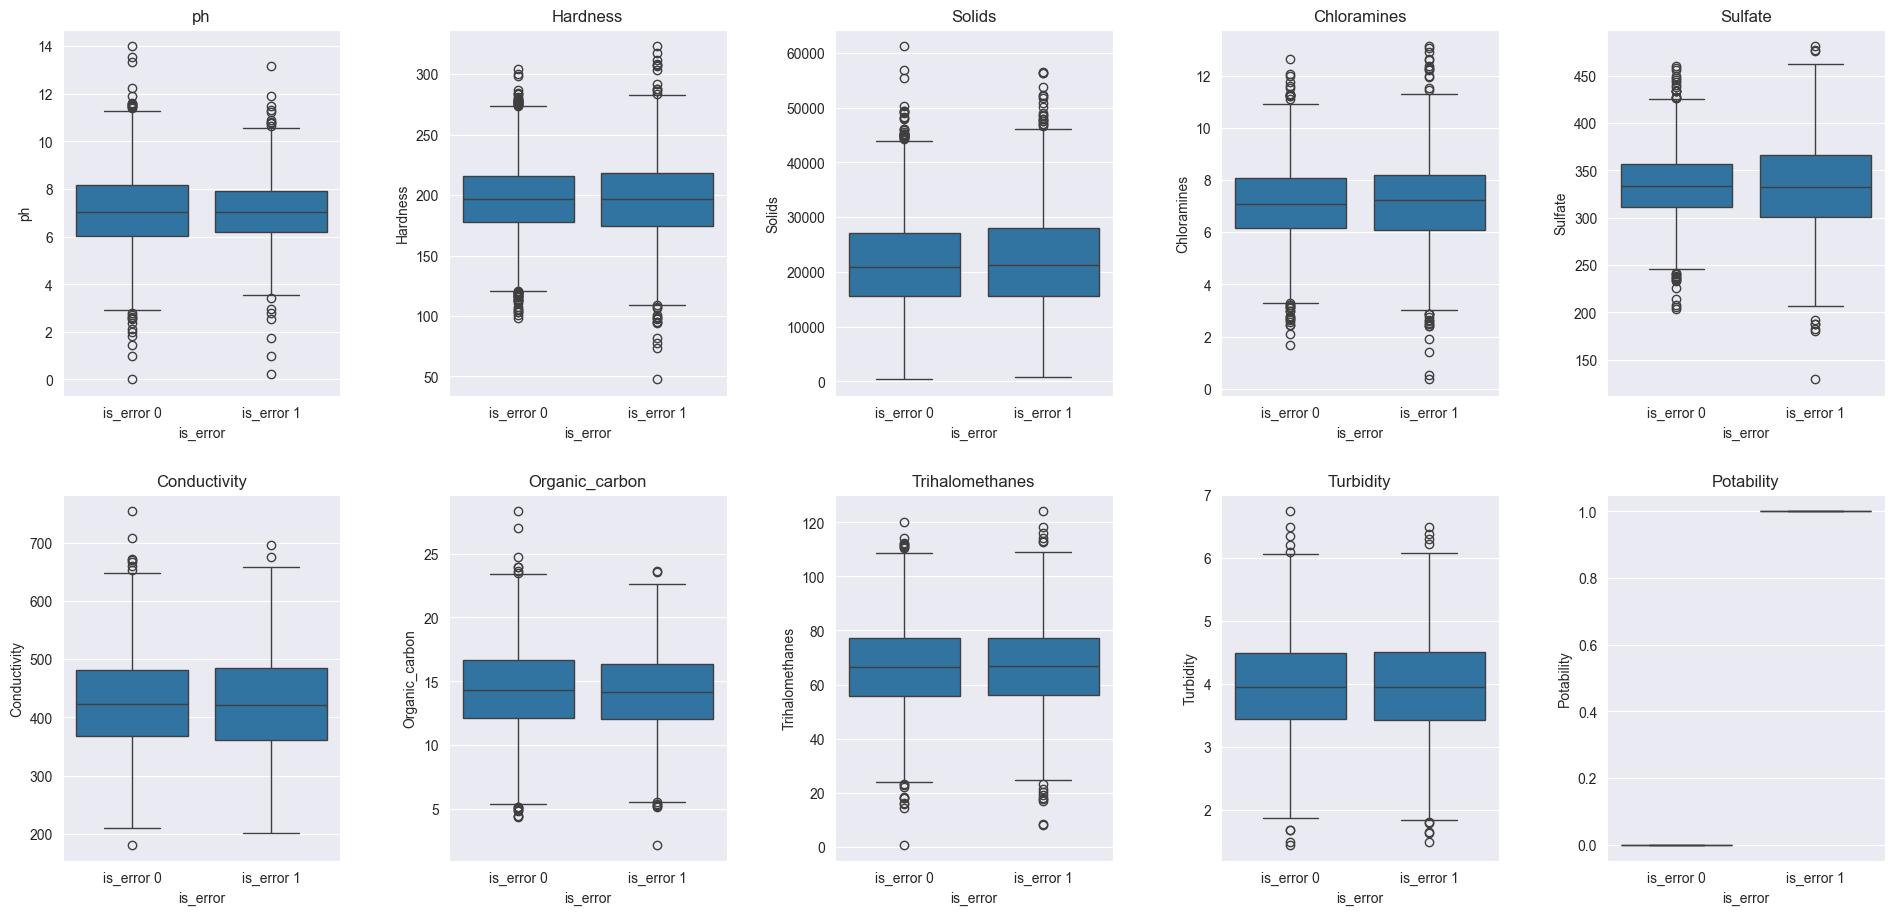

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = df.columns[:-1]  # Exclude the 'Potability' column
potability_values = df['is_error'].unique()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.tight_layout(pad=5.0)

for metric, ax in zip(metrics, axes.flatten()):
    sns.boxplot(data=df, x='is_error', y=metric, ax=ax)
    ax.set_title(metric)
    ax.set_xticks(range(len(potability_values)))  # Explicitly set the tick positions
    ax.set_xticklabels([f'is_error {val}' for val in potability_values])

plt.show()